In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/Dylan/exoplanets/data/cleaned_exoplanets.csv', header = 0)

In [3]:
data.shape #verifying shape of data

(5470, 10)

In [4]:
data = data.drop(['st_rad', 'st_lum', 'st_mass'], axis=1) 

In [5]:
data.isnull().sum()

pl_name        0
pl_orbper      4
pl_orbsmax     7
pl_radj       17
pl_bmassj     25
pl_dens       36
pl_class       6
dtype: int64

In [6]:
data = data.dropna(inplace=False) #dropping rows with null values

In [7]:
data.isnull().sum()

pl_name       0
pl_orbper     0
pl_orbsmax    0
pl_radj       0
pl_bmassj     0
pl_dens       0
pl_class      0
dtype: int64

In [8]:
data.shape

(5431, 7)

In [9]:
#encode the data
classes = ['Gas Giant','Neptune-like','Super Earth','Terrestrial']

label_encoder = LabelEncoder()

# Fit and transform the class labels
encoded_classes = label_encoder.fit_transform(classes)

In [10]:
print(encoded_classes)

[0 1 2 3]


In [11]:
from sklearn.utils import shuffle

# Shuffle the dataset
data = shuffle(data, random_state=42)

In [12]:
X = data.drop(['pl_name','pl_class', 'pl_orbper','pl_orbsmax'], axis=1) #splitting the labels and the data
y = data[['pl_class']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Get the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print(" ")
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3801, 3)
X_test shape: (1630, 3)
 
y_train shape: (3801, 1)
y_test shape: (1630, 1)


In [14]:
train_class_counts = y_train.value_counts()

# Count occurrences of each class in the test set
test_class_counts = y_test.value_counts()

# Print class counts
print("Training set class counts:")
print(train_class_counts)

print("\nTest set class counts:")
print(test_class_counts)

Training set class counts:
pl_class    
Neptune-like    1317
Gas Giant       1183
Super Earth     1162
Terrestrial      139
Name: count, dtype: int64

Test set class counts:
pl_class    
Neptune-like    565
Gas Giant       508
Super Earth     498
Terrestrial      59
Name: count, dtype: int64


In [15]:
#note the giant imbalance in terrestrial planets compared to others

<Axes: ylabel='count'>

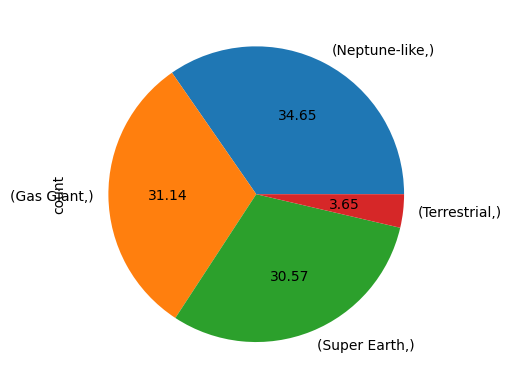

In [16]:
y.value_counts().plot.pie(autopct='%.2f') #show this in a pie chart

In [17]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='auto')
X_train, y_train = rus.fit_resample(X_train, y_train)

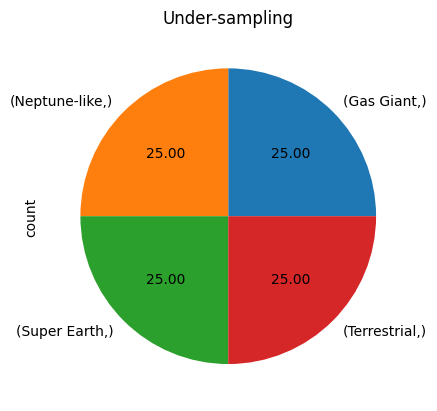

In [18]:
ax = y_train.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling") #verify that the sampling worked

In [37]:
rf_classifier = RandomForestClassifier(n_estimators=35, max_depth=8, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 98.65%


C:\Users\Dylan\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [38]:
# Get the classification report
class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

   Gas Giant       1.00      0.99      0.99       508
Neptune-like       0.99      0.98      0.99       565
 Super Earth       0.98      0.99      0.98       498
 Terrestrial       0.95      1.00      0.98        59

    accuracy                           0.99      1630
   macro avg       0.98      0.99      0.98      1630
weighted avg       0.99      0.99      0.99      1630



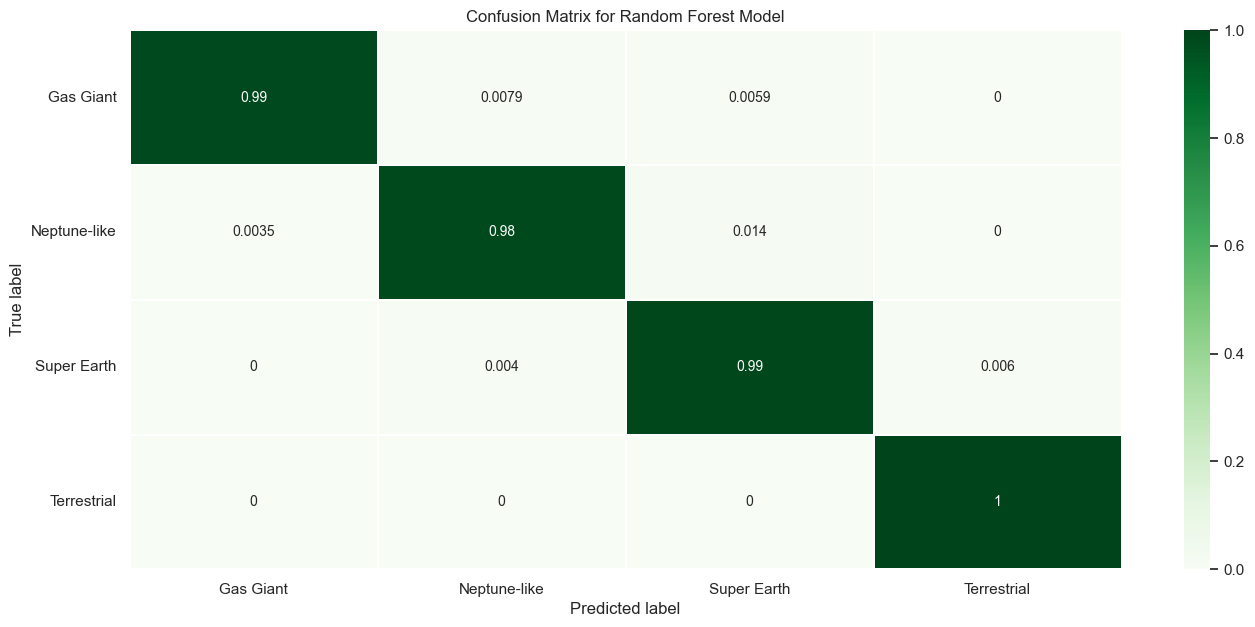

In [48]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Gas Giant', 'Neptune-like', 'Super Earth', 
               'Terrestrial']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [40]:
feature_importances = rf_classifier.feature_importances_


feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})


feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

N = 6
print(feature_importance.head(N))

     Feature  Importance
1  pl_bmassj    0.388370
0    pl_radj    0.340658
2    pl_dens    0.270971


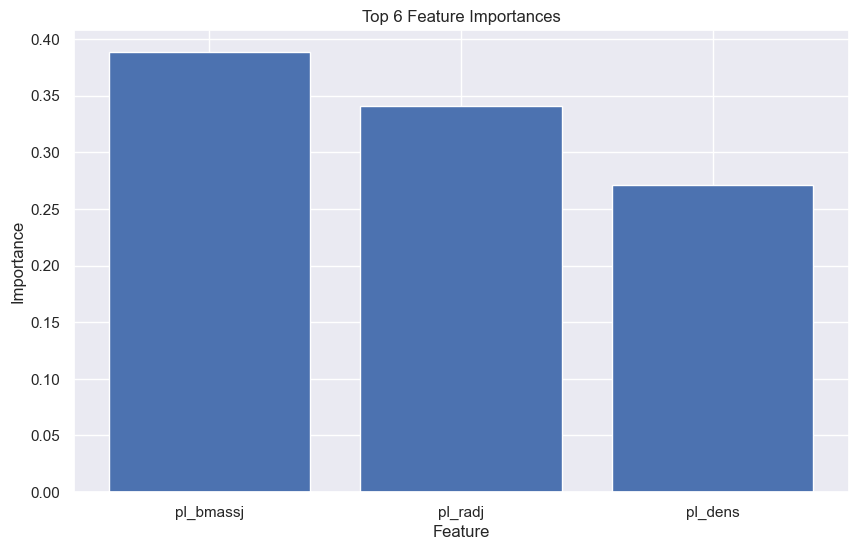

In [41]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title(f'Top {N} Feature Importances')
plt.xticks()  # Rotate x-axis labels for better readability
plt.show()

In [42]:
import joblib

path = 'C:/Users/Dylan/exoplanets/models/exoplanet_classifier.joblib'

joblib.dump(rf_classifier, path)

['C:/Users/Dylan/exoplanets/models/exoplanet_classifier.joblib']

In [6]:
test = pd.read_csv('C:/Users/Dylan/exoplanets/data/more_test.csv', header = 0)

In [7]:
import joblib

model = joblib.load('C:/Users/Dylan/exoplanets/models/exoplanet_classifier.joblib')

In [8]:
test.drop(['pl_name','pl_orbper'], axis=1, inplace=True)

In [9]:
prediction = model.predict(test)

In [10]:
print(prediction)

['Gas Giant' 'Gas Giant' 'Gas Giant' 'Neptune-like' 'Gas Giant'
 'Neptune-like' 'Gas Giant' 'Super Earth' 'Super Earth' 'Super Earth'
 'Neptune-like' 'Gas Giant' 'Gas Giant']
